# Análisis de performance de agentes

In [1]:
import Agents
import random
import pandas as pd
import seaborn as sns

## Se llevará a cabo con la siguiente configuración:

In [2]:
agent_types = [Agents.SimpleReflexAgent, Agents.DumbAgent]
sizes = [2, 4, 8, 16, 32, 64, 128]
dirt_rates = [.1, .2, .4, .8]
agent_life = 1000
iterations = 30
random.seed(42)

---

## Correr simulación

In [3]:
# fn
def execute_simulation(agent_class: Agents.Agent2D.__class__, size, dirt_rate, life):
    # Initialize objects
    env = Agents.Environment([size, size], [random.randint(0, size-1), random.randint(0, size-1)], dirt_rate)
    agent = agent_class(env)

    # Simulate life
    while life > 0 and env.initial_dirt > env.cleaned_slots:
        agent.think()
        life -= 1

    # Return results as a dict
    return {
        'agent_type': agent_class.__name__,
        'size': size,
        'dirt_rate': dirt_rate,
        'cleaned_slots': env.cleaned_slots,
        'remaining_life': life
    }

# Simulate and save results of each case
simulation_list = []

for agent_type in agent_types:
    for size in sizes:
        for dirt_rate in dirt_rates:
            for i in range(iterations):
                simulation_list.append(execute_simulation(agent_type, size, dirt_rate, agent_life))

# Print table
simulation_df = pd.DataFrame(simulation_list)
simulation_df

,agent_type,size,dirt_rate,cleaned_slots,remaining_life
0,SimpleReflexAgent,2,0.1,0,1000
1,SimpleReflexAgent,2,0.1,2,993
2,SimpleReflexAgent,2,0.1,0,1000
3,SimpleReflexAgent,2,0.1,2,996
4,SimpleReflexAgent,2,0.1,1,998
...,...,...,...,...,...
1675,DumbAgent,128,0.8,100,0
1676,DumbAgent,128,0.8,99,0
1677,DumbAgent,128,0.8,88,0
1678,DumbAgent,128,0.8,82,0


## Análisis de cada configuración

In [4]:
samples_list = []

for agent_type in agent_types:
    for size in sizes:
        for dirt_rate in dirt_rates:
            sample_df = simulation_df.query(f'agent_type == "{agent_type.__name__}" and size == {size} and dirt_rate == {dirt_rate}')

            samples_list.append({
                'agent_type': agent_type.__name__,
                'size': size,
                'dirt_rate': dirt_rate,
                'cleaned_slots_avg': sample_df['cleaned_slots'].mean(),
                'cleaned_slots_std': sample_df['cleaned_slots'].std(),
                'remaining_life_avg': sample_df['remaining_life'].mean(),
                'remaining_life_std': sample_df['remaining_life'].std(),
            })

# Print table
samples_df = pd.DataFrame(samples_list)
samples_df

,agent_type,size,dirt_rate,cleaned_slots_avg,cleaned_slots_std,remaining_life_avg,remaining_life_std
0,SimpleReflexAgent,2,0.1,0.633333,0.850287,997.800000,3.623677
1,SimpleReflexAgent,2,0.2,0.733333,0.784915,997.533333,3.421366
2,SimpleReflexAgent,2,0.4,1.700000,0.794377,992.600000,4.903201
3,SimpleReflexAgent,2,0.8,3.033333,0.889918,991.033333,5.075182
4,SimpleReflexAgent,4,0.1,1.700000,1.235956,959.566667,47.963120
5,SimpleReflexAgent,4,0.2,2.900000,1.604949,952.366667,30.135880
6,SimpleReflexAgent,4,0.4,6.333333,1.917853,916.100000,49.763129
7,SimpleReflexAgent,4,0.8,12.800000,1.270352,895.100000,42.999880
8,SimpleReflexAgent,8,0.1,7.366667,2.709922,616.233333,217.689067
9,SimpleReflexAgent,8,0.2,12.233333,2.800041,450.333333,270.013452


## Gráficos
### Box plot - Performance SimpleReflexAgent y DumbAgent en cada configuración
Performance -> slots limpiados

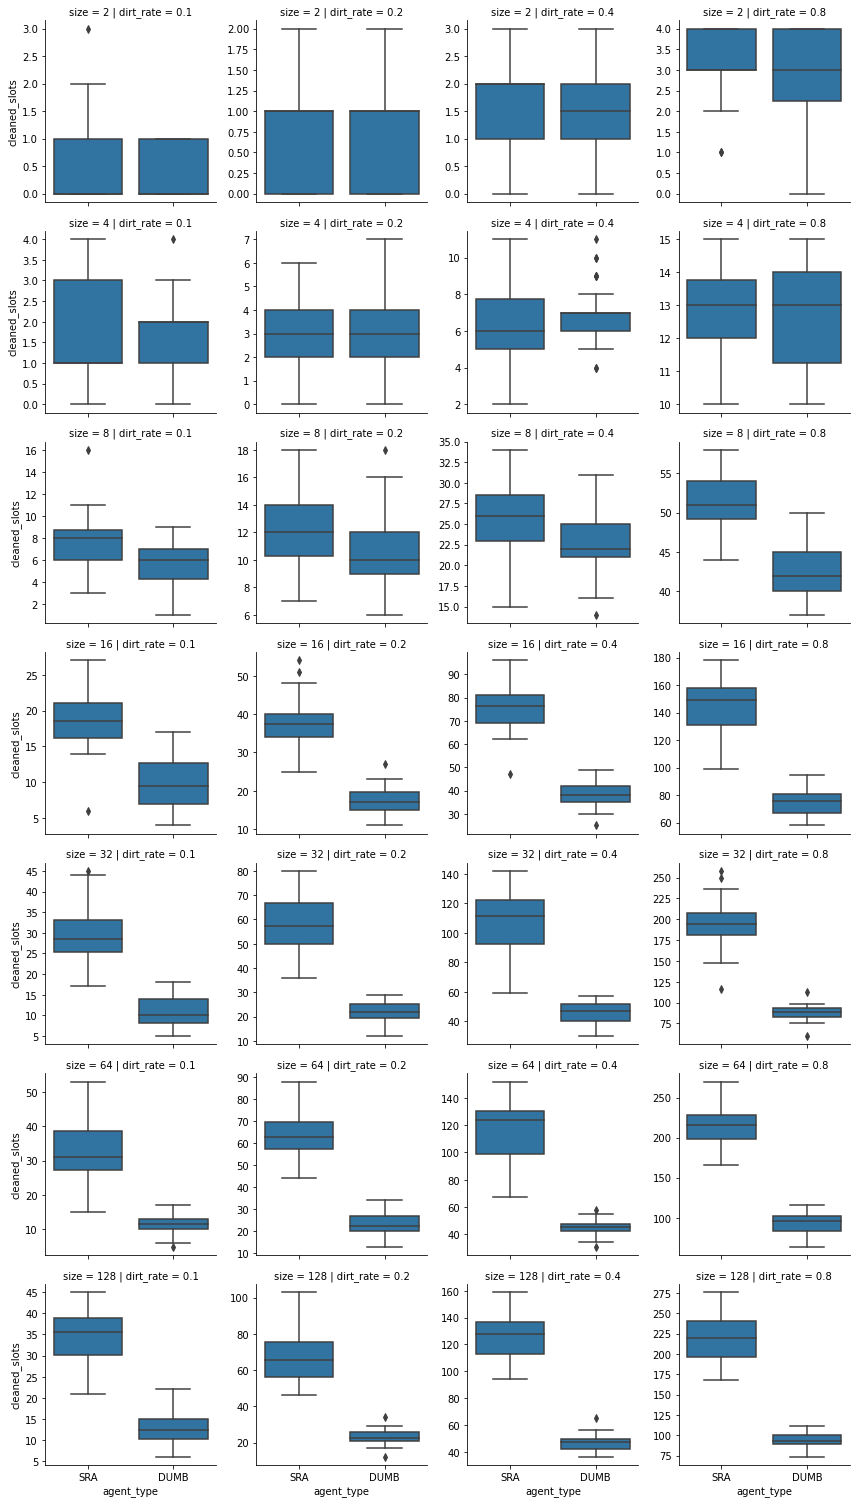

In [5]:
%matplotlib inline

grid = sns.FacetGrid(data=simulation_df,
                     row='size',
                     col='dirt_rate',
                     sharey=False)
grid.map(sns.boxplot, 'agent_type', 'cleaned_slots', order= [x.__name__ for x in agent_types])
grid.set_xticklabels(['SRA', 'DUMB'])

### Lineplot del performance (cleaned_rate) según el tamaño (size)
_Eje y en escala logarítmica_

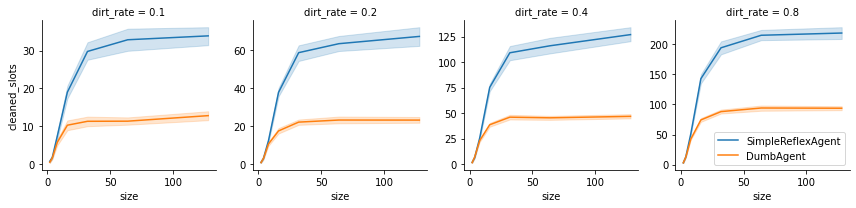

In [6]:
%matplotlib inline

grid2 = sns.FacetGrid(data=simulation_df, col='dirt_rate', sharey=False)
grid2.map(sns.lineplot, 'size', 'cleaned_slots', 'agent_type')
grid2.axes[0][-1].legend()